In [51]:
import pandas as pd
import gzip
import json
import pickle
import zipfile
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zip_json_file = 'preprocessed_reviews.json.gz'

# Read the zipped JSON file into a string
with gzip.open(zip_json_file, 'rt') as f:
    json_data = f.read()

# Convert the JSON data to a DataFrame
reviews = pd.read_json(json_data)

In [3]:
reviews.head()

,reviewerName,reviewText,summary,preprocessed_reviewText,tokens,review_lengths
0,Michelle W,The materials arrived early and were in excell...,Material Great,material arrive early excellent condition howe...,"[material, arrive, early, excellent, condition...",13
1,Rosalind White Ames,I am really enjoying this book with the worksh...,Health,really enjoy book worksheet make review goal m...,"[really, enjoy, book, worksheet, make, review,...",12
2,Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,take class do nt waste money call book book is...,"[take, class, do, nt, waste, money, call, book...",28
3,Lucy,This book was missing pages!!! Important pages...,missing pages!!,book miss page important page could answer tes...,"[book, miss, page, important, page, could, ans...",11
4,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,use learnsmart officially say amazing study to...,"[use, learnsmart, officially, say, amazing, st...",50


In [4]:
# Select the first 100 rows of your DataFrame
subdata = reviews.head(100).copy()

## TF-IDF

In [5]:
# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Combine the tokens into space-separated strings for TF-IDF
reviews['token_string'] = reviews['tokens'].apply(lambda tokens: ' '.join(tokens))

# Fit the vectorizer to the text data and transform it into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(reviews['token_string'])

# Convert the TF-IDF vectors to an array
tfidf_array = tfidf_vectors.toarray()

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for better visualization (optional)
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# Print the TF-IDF vectors
tfidf_df


,ability,able,absolutely,accept,access,account,accountant,accounting,accurate,acronis,...,worry,worth,would,write,wrong,xp,year,yes,yet,zero
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.175363,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.126792,0.118948,0.0,0.482784,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458753,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
458754,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
458755,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.209494,0.0,0.0,0.0
458756,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [58]:
import numpy as np

def get_top_tf_idf_words(response, top_n=10):
    sorted_nzs = np.argsort(response)[-top_n:]
    return feature_names[sorted_nzs]

# Create an empty list to store the top TF-IDF words for each document
top_words_per_document = []

# Iterate through the TF-IDF vectors for each document
for response in tfidf_array:
    top_words = get_top_tf_idf_words(response, top_n=10)
    top_words_per_document.append(top_words)

# Combine the results into a DataFrame for better visualization (optional)
top_words_df = pd.DataFrame(top_words_per_document, columns=[f'TF-IDF_{i+1}' for i in range(10)])

# Print the DataFrame with the top TF-IDF words for each document
print(top_words_df)


        TF-IDF_1  TF-IDF_2 TF-IDF_3  TF-IDF_4   TF-IDF_5   TF-IDF_6  \
0            fix    really    money      come    however      spend   
1        finance    folder     five       fix      flash     really   
2       complete   provide   access      turn    connect      class   
3          could     never     book  question     happen     answer   
4        amazing   realize   letter     style        use    quickly   
...          ...       ...      ...       ...        ...        ...   
458753       fit    finish     fine      find  financial   firewall   
458754     first       fit     five       fix      flash     folder   
458755      five       fix      use      year       find      quite   
458756       fit  firewall   finish      fine       find  financial   
458757     first  firewall   finish      fine       find        fit   

         TF-IDF_7  TF-IDF_8   TF-IDF_9   TF-IDF_10  
0       excellent     early     arrive    material  
1          review      book      enjoy   

In [14]:
# Calculate the average TF-IDF value for each word across all documents
average_tfidf_values = tfidf_df.mean()

# Get the top N words with the highest average TF-IDF values
top_n = 10  # Change this to the desired number of top words
top_words_and_values = average_tfidf_values.nlargest(top_n)

# Create a DataFrame for better visualization (optional)
top_words_df = pd.DataFrame({'Word': top_words_and_values.index, 'Average TF-IDF Value': top_words_and_values.values})

# Print the DataFrame with the top words and their corresponding average TF-IDF values
print(top_words_df)

       Word  Average TF-IDF Value
0       use              0.050713
1      work              0.045987
2     great              0.040269
3   product              0.038960
4      good              0.035962
5  software              0.032360
6   program              0.031042
7      year              0.030029
8       get              0.029358
9      easy              0.028220


In [15]:
# Calculate the average TF-IDF value for each word across all documents
average_tfidf_values = tfidf_df.mean()

# Filter out words with TF-IDF values equal to 0
non_zero_tfidf_values = average_tfidf_values[average_tfidf_values != 0]

# Get the lowest N non-zero words with the lowest average TF-IDF values
top_n = 10  # Change this to the desired number of lowest non-zero words
lowest_non_zero_words_and_values = non_zero_tfidf_values.nsmallest(top_n)

# Create a DataFrame for better visualization (optional)
lowest_non_zero_words_df = pd.DataFrame({'Word': lowest_non_zero_words_and_values.index, 'Average TF-IDF Value': lowest_non_zero_words_and_values.values})

# Print the DataFrame with the lowest non-zero words and their corresponding average TF-IDF values
print(lowest_non_zero_words_df)

       Word  Average TF-IDF Value
0      drag              0.000731
1    object              0.000787
2   dictate              0.000803
3      core              0.000807
4       tab              0.000808
5     group              0.000822
6        mb              0.000829
7   initial              0.000833
8    nuance              0.000841
9  explorer              0.000845


In [10]:
# Find the highest TF-IDF score and its corresponding word for each document
highest_tfidf_scores = []
highest_tfidf_words = []

for index, row in tfidf_df.iterrows():
    max_tfidf_score = max(row)
    max_tfidf_word = feature_names[row.tolist().index(max_tfidf_score)]
    highest_tfidf_scores.append(max_tfidf_score)
    highest_tfidf_words.append(max_tfidf_word)

# Combine the results into a DataFrame for better visualization (optional)
highest_tfidf_df = pd.DataFrame({'Word': highest_tfidf_words, 'TF-IDF Score': highest_tfidf_scores})

# Print the DataFrame with the highest TF-IDF scores
print(highest_tfidf_df)


              Word  TF-IDF Score
0         material      0.448200
1             make      0.569378
2             book      0.685544
3             page      0.549373
4       accounting      0.482784
...            ...           ...
458753        help      0.708296
458754     ability      0.000000
458755   effective      0.490762
458756       value      0.888074
458757      design      0.650520

[458758 rows x 2 columns]


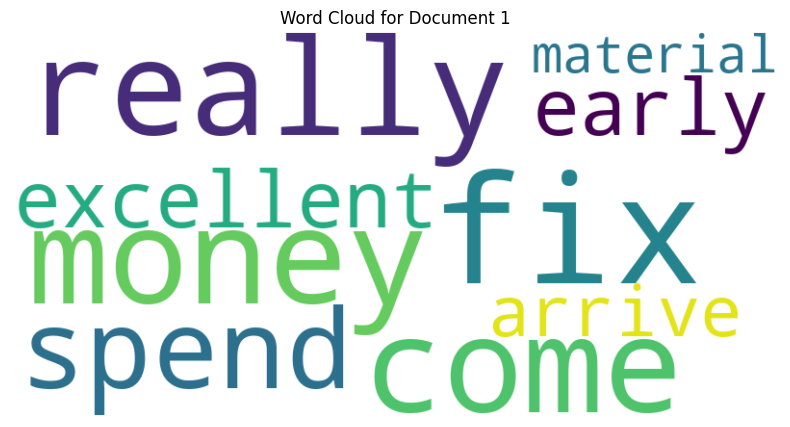

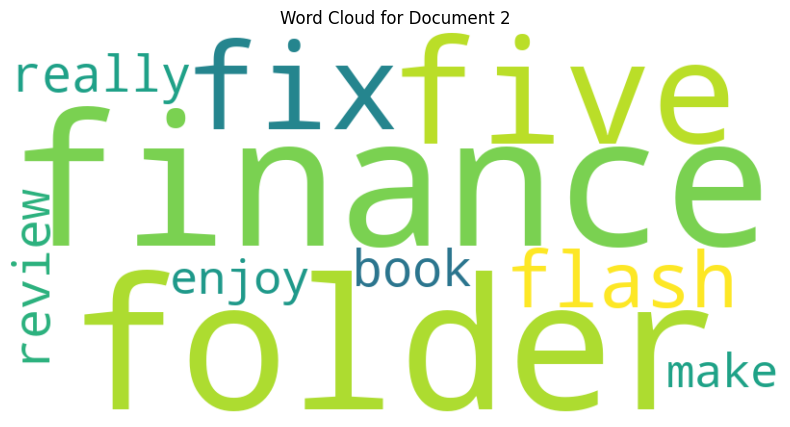

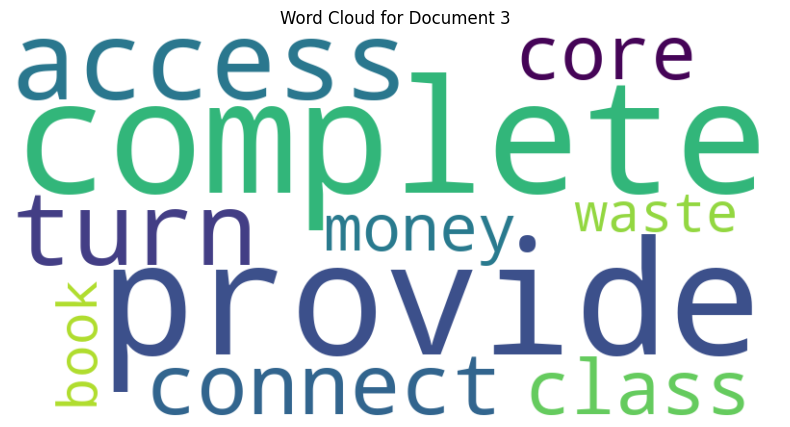

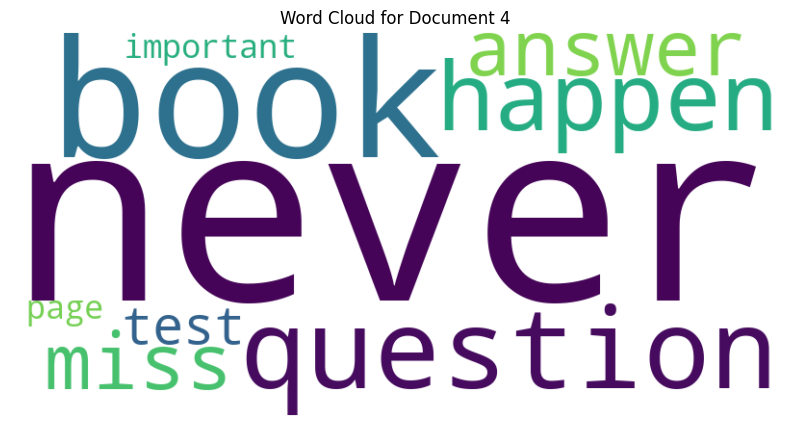

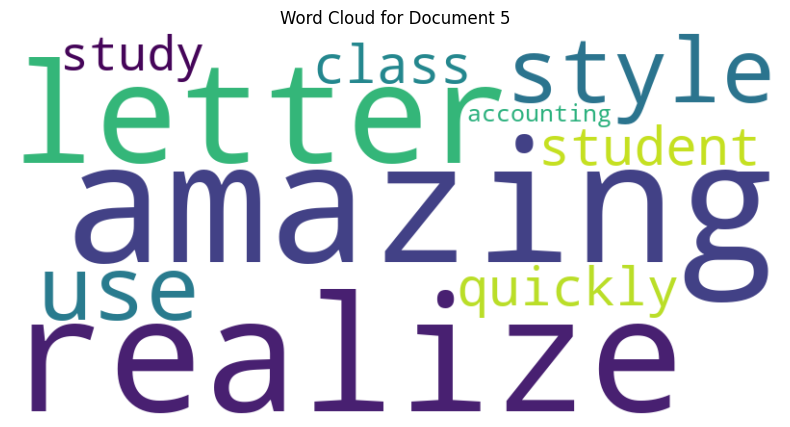

In [20]:
def get_top_tf_idf_words(response, top_n=10):
    sorted_indices = np.argsort(response)[-top_n:]
    top_words = [feature_names[i] for i in sorted_indices]
    return ' '.join(top_words)

# Create a list of top TF-IDF words for each document
top_words_per_document = [get_top_tf_idf_words(response, 10) for response in tfidf_array]

# Create word clouds and display them for the first five documents
for i, top_words in enumerate(top_words_per_document[:5]):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Document {i + 1}')
    plt.show()


## BAG-OF-WORDS

In [22]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer(max_features=1000)

# Fit the vectorizer to the text data and transform it into a Bag of Words matrix
X = vectorizer.fit_transform(reviews['token_string'])

# Convert the Bag of Words matrix to an array
bag_of_words = X.toarray()

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

bag_of_words_df = pd.DataFrame(bag_of_words, columns=feature_names)
bag_of_words_df


,ability,able,absolutely,accept,access,account,accountant,accounting,accurate,acronis,...,worry,worth,would,write,wrong,xp,year,yes,yet,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
458756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


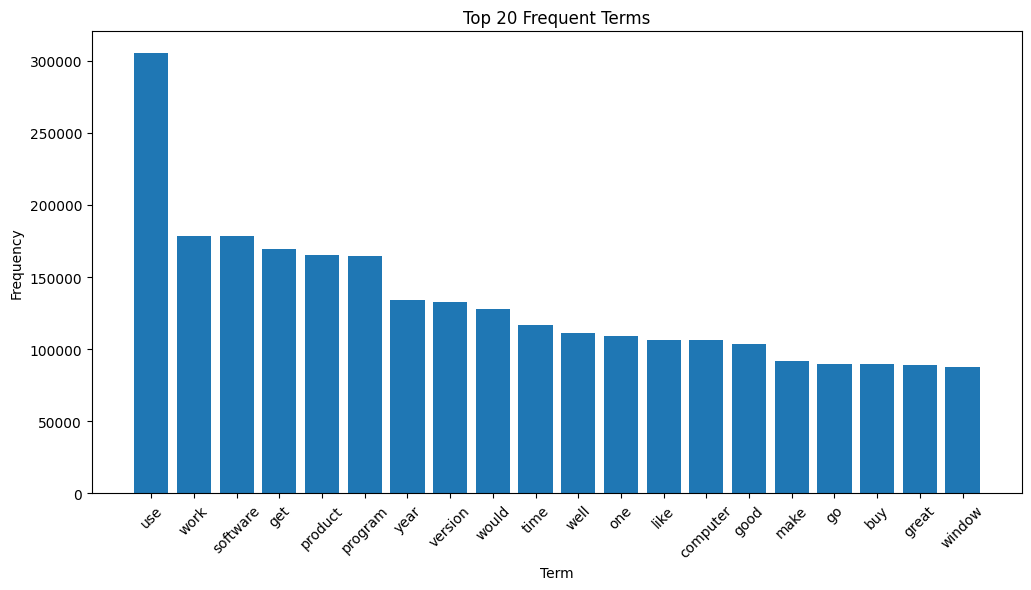

In [64]:
import numpy as np

term_frequencies = bag_of_words.sum(axis=0)
sorted_indices = np.argsort(term_frequencies)[::-1]  # Sort term indices by frequency in descending order

# Get the top N frequent terms and their frequencies
N = 20
top_terms = [feature_names[i] for i in sorted_indices[:N]]
top_frequencies = term_frequencies[sorted_indices[:N]]

plt.figure(figsize=(12, 6))
plt.bar(top_terms, top_frequencies)
plt.xticks(rotation=45)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Top 20 Frequent Terms')
plt.show()


## WORD2VEC

In [39]:
# Define Word2Vec parameters
vector_size = 100  # The dimensionality of the word vectors
window = 5         # The maximum distance between the current and predicted word
min_count = 1      # Ignores all words with a total frequency lower than this value
sg = 1             # 1 for skip-gram model; 0 for CBOW

# Train Word2Vec model
model = Word2Vec(sentences=reviews['tokens'], vector_size=vector_size, window=window, min_count=min_count, sg=sg)

# Save the trained model
model.save("word2vec.model")


In [65]:
# Load the trained model
model = Word2Vec.load("word2vec.model")

# Get the vector for a specific word
vector = model.wv["easy"]

# Find similar words
similar_words = model.wv.most_similar("easy")
# print(vector)
print(similar_words)

[('simple', 0.844424843788147), ('breeze', 0.8236501812934875), ('breezy', 0.8044548034667969), ('easier', 0.8002127408981323), ('cinch', 0.7889582514762878), ('eazy', 0.7857481241226196), ('simpli', 0.7735766768455505), ('straightforward', 0.773544192314148), ('intutive', 0.7728196978569031), ('easyand', 0.7719935774803162)]


In [55]:
# Create Word2Vec model (CBOW)
model_cbow = Word2Vec(reviews['tokens'], min_count=1, vector_size=100, window=5)

# Print cosine similarities
print("Cosine similarity between 'good' and 'excellent' - CBOW:", model_cbow.wv.similarity('good', 'excellent')) # Positive Sentiment
print("Cosine similarity between 'good' and 'awful' - CBOW:", model_cbow.wv.similarity('good', 'awful')) # Negative Sentiment
print("Cosine similarity between 'fast' and 'efficient' - CBOW:", model_cbow.wv.similarity('fast', 'efficient')) # Feature
print("Cosine similarity between 'more' and 'less' - CBOW:", model_cbow.wv.similarity('more', 'less')) # Comparative

Cosine similarity between 'good' and 'excellent' - CBOW: 0.68438506
Cosine similarity between 'good' and 'awful' - CBOW: 0.31477126
Cosine similarity between 'fast' and 'efficient' - CBOW: 0.5641124
Cosine similarity between 'more' and 'less' - CBOW: 0.0057785483


In [56]:
# Create Skip Gram model
model_skipgram = Word2Vec(reviews['tokens'], min_count=1, vector_size=100, window=5, sg=1)

# Print cosine similarities
print("Cosine similarity between 'good' and 'excellent' - Skip Gram:", model_skipgram.wv.similarity('good', 'excellent')) # Positive Sentiment:
print("Cosine similarity between 'good' and 'awful' - Skip Gram:", model_skipgram.wv.similarity('good', 'awful')) # Negative Sentiment:
print("Cosine similarity between 'fast' and 'efficient' - Skip Gram:", model_skipgram.wv.similarity('fast', 'efficient')) # Feature
print("Cosine similarity between 'more' and 'less' - Skip Gram:", model_skipgram.wv.similarity('more', 'less')) # Comparative

# COSINE SIMILARITY: -1 LOW CORRELATION, 1 HIGH CORRELATION

Cosine similarity between 'good' and 'excellent' - Skip Gram: 0.8105775
Cosine similarity between 'good' and 'awful' - Skip Gram: 0.59360033
Cosine similarity between 'fast' and 'efficient' - Skip Gram: 0.77088404
Cosine similarity between 'more' and 'less' - Skip Gram: 0.5908908
